# Machine Learning and Statistics Assignment 

## Autumn/Winter 2021

---
Part 1 - scikit-learn
---

<br>

![scikit_logo](./Images/scikit-learn-logo.png)

<br>

### Overview of the scikit-learn Python library  
[scikit-learn homepage](https://scikit-learn.org/stable/)

>"Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy." https://en.wikipedia.org/wiki/Scikit-learn

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. It started out life as `scikits.learn` developed by French data scientist David Cournapeau, but was rewritten and further developed and the first public release was in 2010. The name scikit comes from SciPy Toolkit.

#### Machine learning

Machine learning considers a set of data values and tries to predict the properties of unknown data based on what it has 'learnt'. It can be broken down into a few categories and subcategories.

>Supervised learning, in which the data comes with additional attributes that we want to predict. This problem can be either:
>
> - classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. 
>
> - regression: if the desired output consists of one or more continuous variables, then the task is called regression.
>
> Unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.  
https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.  
https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting

<br>
Some terminology: 

- Classification - Identifying which category an object belongs to
- Regression - Predicting a continuous-valued attribute associated with an object
- Clustering - Automatic grouping of similar objects into sets
- Dimensionality reduction - Reducing the number of random variables to consider
- Model selection - Comparing, validating and choosing parameters and models
- Preprocessing - Feature extraction and normalization

___

<br>

## The Wine dataset
___

I'm going use a wine dataset I discovered online to give an overview of the package and to demonstrate some of the algorithims. It seems to be quite a popular dataset as there are many analyses already published, so I probably won't discover anything new!

The dataset contains details of red and white versions of the Portuguese wine Vinho Verde.

![vinhoVerde](Images/vinhoVerde.png)

We begin by importing all of the necessary libraries.

In [1]:
# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Logistic regression
import sklearn.linear_model as lm

# K nearest neighbours
import sklearn.neighbors as nei

# train_test_split
from sklearn.model_selection import train_test_split

# Helper functions
import sklearn.model_selection as mod

from sklearn.preprocessing import StandardScaler

# Fancier, statistical plots
import seaborn as sns

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

We set a size and style for all plots.

In [2]:
# set global size for all plots
plt.rcParams["figure.figsize"] = (15,10)

# set global style for all plots
plt.style.use('ggplot')

We load in the data from a csv file with `pandas` and have a look at the first 10 rows.

In [3]:
# Load the wine data set from a URL.
df = pd.read_csv("Data/winequalityN.csv")
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


We use the `.info()` and `.describe()` functions to get a an overview of the data.

In [4]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# check for nulls
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
# data statistics.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


So we have 6497 entries in total, but some variables seem to be missing entries - not sure how this will affect things! 
Also we notice some unusually disparate values. The max residual sugar is 65.8 which is sickly sweet and not at all typical of vinho verde! As residual sugar is an important basic component of wine, and one I'm very likely to include in any analysis, I'd be tempted to exclude this as it may skew the figures somewhat. 'Free sulfur dioxide' and 'total sulfur dioxide' also seem to have vast ranges and massive standard deviations so I may have to look into those further as well if we end up using them.  
All entires are floating point numbers except type and quality. From the outset it was clear that I'd either be trying to use machine learning to predict whether the wine was white or red, or whether we could predict the quality. I'm assuming that the former of these should be fairly straight forward so I'll concentrate on the latter. We first see what range of quality values we're dealing with using firstly the `.unique()` method and then `.value_counts()`.

In [7]:
# check for unique numbers in quality scores
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
# value counts for quality
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:title={'center':'frequency of quality scores'}, xlabel='quality score', ylabel='frequency'>

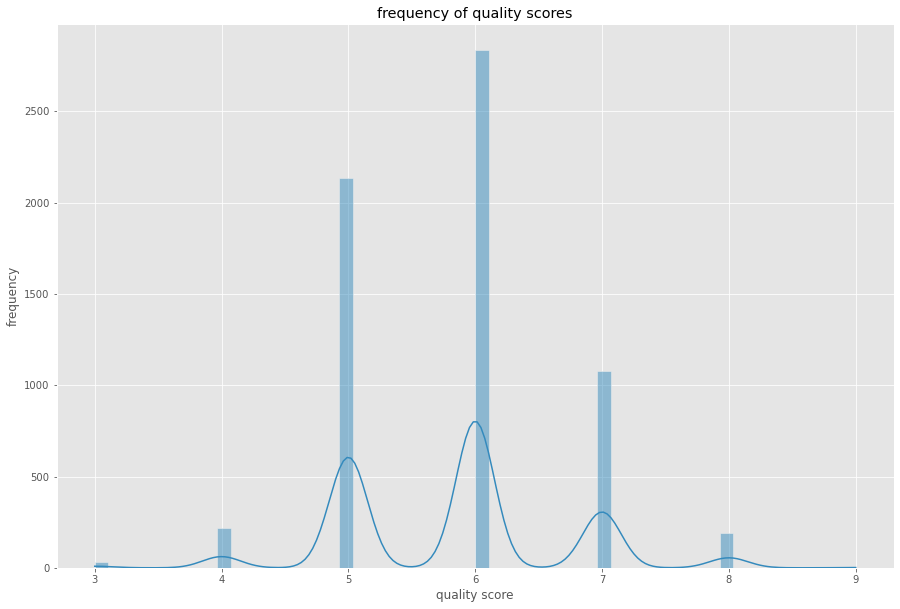

In [9]:
# visualise breakdown of quality scores on a histogram
plt.xlabel("quality score")
plt.ylabel("frequency")
plt.title("frequency of quality scores")
sns.histplot(data=df, x='quality', kde=True)

We can see that the range of scores runs from 3 to 9 with the majority of scores falling around 5,6,7. It has been suggested in other analyses to split the 7 groups into 3 or 2 so I might try that. With only 5 entries out of 6497, it would be unreasonable to expet the model to identify a 9 scoring wine!  
Then we look at the breakdown of red and white.

In [10]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

I think we'll concentrate on just white wine. In theory red and white wine should have much different parameters so I don't think it'll be very helpful to consider them together. So we create a new dataset with just the white wines.

In [11]:
# separate the white wines
dfnew = df.loc[df['type'] == "white"]

# print out the new head
dfnew.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


We no longer need the type column so I'll delete that.

In [13]:
dfnew = dfnew.drop(columns=['type'])
dfnew.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Now to deal with the null values. It was suggested to fill these in with average values. The following code is from https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/

In [14]:
# fill all nulls with mean values
dfnew.update(dfnew.fillna(dfnew.mean()))

In [15]:
# check to see if it worked
dfnew.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We'll take a look at the **correlation** now with a heatmap using `seaborn`.  
Few tips from here - https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434

<AxesSubplot:>

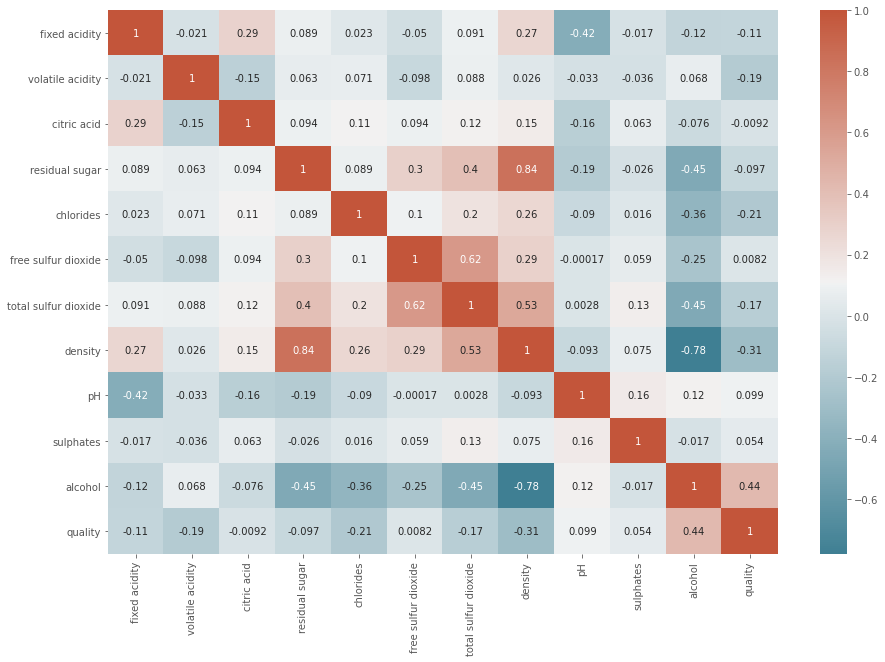

In [16]:
# visualise correlation
corr = dfnew[dfnew.columns].corr()
sns.heatmap(corr, annot = True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The darker squares represent a higher correlation between variables so we can see a few notable instances here. We will come back to this later.

<br>

### Classificaton

We going to split the dataset into 2 - wine and better wine! Better wine will have a score of 7 or higher. The following code creates a new column and then separates the betterQuality column from the rest of the dataframe. The betterQuality column will just be 0 or 1.

In [17]:
# Create Classification version of target variable
dfnew['betterQuality'] = [1 if x >= 7 else 0 for x in dfnew['quality']]

# Separate feature variables and target variable
X = dfnew.drop(['quality','betterQuality'], axis = 1)
y = dfnew['betterQuality']

In [18]:
dfnew['betterQuality'].value_counts()

0    3838
1    1060
Name: betterQuality, dtype: int64

In [19]:
dfnew.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,betterQuality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


<br>

___

## K-Nearest Neighbor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

___

>"*In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression.*" https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

**K-Nearest Neighbor** is a supervised classification algorithm used to assign a class to new data point. In our case, we are trying to work out, if we had the relevent data points for an unknown wine, could we assign it to one of our three.

https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

In [20]:
# create the classifier
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [21]:
# fit the classifier
knn.fit(X, y)

KNeighborsClassifier()

In [22]:
# pick an entry to test
dfnew.loc[34]

fixed acidity             5.8000
volatile acidity          0.2700
citric acid               0.2000
residual sugar           14.9500
chlorides                 0.0440
free sulfur dioxide      22.0000
total sulfur dioxide    179.0000
density                   0.9962
pH                        3.3700
sulphates                 0.3700
alcohol                  10.2000
quality                   5.0000
betterQuality             0.0000
Name: 34, dtype: float64

In [23]:
# entry test entries values to check
knn.predict([[5.8, 0.27, 2.00, 14.95, 0.044, 22, 179, 0.9962, 3.37, 0.37, 10.2]])

array([0])

Correct!!!

In [24]:
# checking the accuracy of the training sample
knn.score(X, y)

0.8579011841567987

Not bad!

### Evaluate

In [25]:
# this sees how well it's working
# Counts the amount of Trues (1) and adds them up
(knn.predict(X) == y).sum()

4202

The total sample was 4898 so this is about 85%. Not too bad but not brilliant either!
___

If we change quality to the binary version and run corr again, is there any difference?

In [26]:
Z = dfnew.drop(['quality'], axis = 1)

<AxesSubplot:>

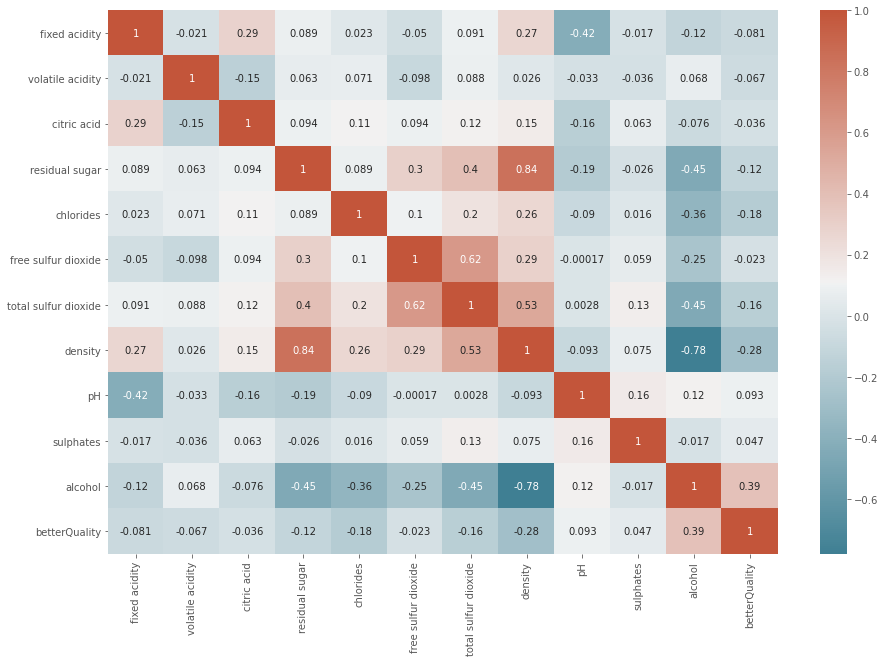

In [27]:
corr = Z[Z.columns].corr()
sns.heatmap(corr, annot = True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<br>

### Decision trees and Random forests

We're going to look at decision trees and random forests next. These are ........

First we need to process the data a little.

<br>

#### Standardizing the data

This transforms the data so that its distribution will have a mean of 0 and a standard deviation of 1. It’s important to standardize your data in order to equalize the range of the data.

In [28]:
# standarise the data
X_features = X
X = StandardScaler().fit_transform(X)

<br>

#### Splitting the data

We split the data into a training sample and a test sample.

In [29]:
# Splitting the data - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [30]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       963
           1       0.58      0.58      0.58       262

    accuracy                           0.82      1225
   macro avg       0.73      0.73      0.73      1225
weighted avg       0.82      0.82      0.82      1225



In [31]:
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       963
           1       0.76      0.54      0.63       262

    accuracy                           0.87      1225
   macro avg       0.82      0.75      0.78      1225
weighted avg       0.86      0.87      0.86      1225



In [32]:
# Filtering df for only good quality
df_temp = dfnew[dfnew['betterQuality']==1]
df_temp.mean()

fixed acidity             6.725760
volatile acidity          0.265426
citric acid               0.326057
residual sugar            5.265371
chlorides                 0.038160
free sulfur dioxide      34.550472
total sulfur dioxide    125.245283
density                   0.992412
pH                        3.214770
sulphates                 0.500142
alcohol                  11.416022
quality                   7.174528
betterQuality             1.000000
dtype: float64

In [33]:
# Filtering df for only bad quality
df_temp2 = dfnew[dfnew['betterQuality']==0]
df_temp2.mean()

fixed acidity             6.891373
volatile acidity          0.281794
citric acid               0.336513
residual sugar            6.704753
chlorides                 0.047882
free sulfur dioxide      35.517327
total sulfur dioxide    141.982934
density                   0.994474
pH                        3.180865
sulphates                 0.486988
alcohol                  10.265215
quality                   5.519802
betterQuality             0.000000
dtype: float64

The most notable differences are alcohol, residual sugar, total sulfur dioxide

<br>

---

#### Test and Train Split

In [34]:
# Split the data frame in two.
train, test = mod.train_test_split(dfnew)

In [35]:
train.index.size

3673

In [36]:
test.index.size

1225

In [37]:
good = train[train['betterQuality'] == 0]
better = train[train['betterQuality'] == 1]

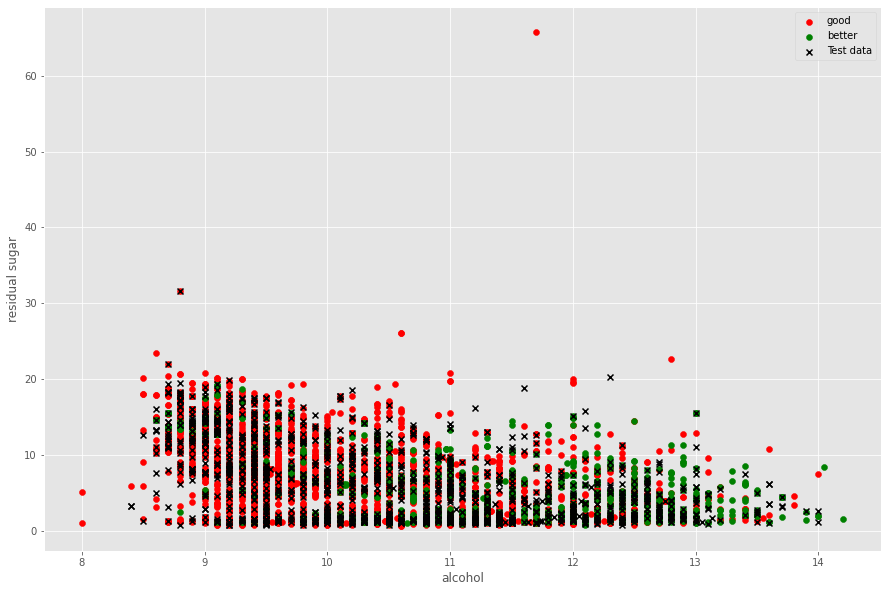

In [38]:
# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(good['alcohol'], good['residual sugar'], marker='o', label='good', color='r')
ax.scatter(better['alcohol'], better['residual sugar'], marker='o', label='better', color='g')

# Scatter plot for testing data.
ax.scatter(test['alcohol'], test['residual sugar'], marker='x', label='Test data', color='k')

# Show the legend.
ax.set_xlabel('alcohol')
ax.set_ylabel('residual sugar')
ax.legend();

Looks like an outlier which is skewing the plot a bit!

<br>

#### Two Dimensions: Inputs and outputs

In [39]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['alcohol', 'residual sugar']], train['betterQuality']


In [40]:
inputs.head()

,alcohol,residual sugar
4701,10.1,7.6
767,10.9,1.6
1473,10.8,5.9
4513,11.2,2.8
2497,8.8,18.1


In [41]:
outputs.head()

4701    0
767     0
1473    0
4513    0
2497    0
Name: betterQuality, dtype: int64

<br>

___

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

---

In [42]:
# X = dfnew[['alcohol', 'residual sugar']]
# y = dfnew[['betterQuality']]

In [43]:
# # Splitting the data - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
# X_train.count()

In [45]:
# inputs, outputs = X_train, y_train

In [46]:
# outputs

In [47]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [48]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['alcohol', 'residual sugar']])
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [49]:
# Eyeball the misclassifications.
predictions == test['betterQuality']

1865     True
1574     True
61       True
4714    False
987      True
        ...  
1181     True
4882     True
4756     True
1091     True
3458     True
Name: betterQuality, Length: 1225, dtype: bool

In [50]:
# What proportion were correct?
lre.score(test[['alcohol', 'residual sugar']], test['betterQuality'])

0.8

In [51]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-51-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,betterQuality,predicted
1865,7.6,0.36,0.44,8.30,0.255,28.0,142.0,0.99580,3.12,0.43,10.2,6,0,0
1574,8.5,0.17,0.49,8.80,0.048,23.0,108.0,0.99470,2.88,0.34,10.5,4,0,0
61,6.0,0.19,0.26,12.40,0.048,50.0,147.0,0.99720,3.30,0.36,8.9,6,0,0
4714,6.1,0.22,0.40,1.85,0.031,25.0,111.0,0.98966,3.03,0.30,11.8,7,1,0
987,7.4,0.30,0.30,5.20,0.053,45.0,163.0,0.99410,3.12,0.45,10.3,6,0,0


In [52]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['betterQuality']]
misclass

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,betterQuality,predicted
4714,6.1,0.22,0.40,1.85,0.031,25.0,111.0,0.98966,3.03,0.30,11.8,7,1,0
2810,7.8,0.26,0.31,3.60,0.025,22.0,100.0,0.99066,2.99,0.47,12.1,7,1,0
1981,7.6,0.20,0.30,14.20,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,1,0
1199,7.4,0.25,0.37,6.90,0.020,14.0,93.0,0.99390,3.00,0.48,10.7,7,1,0
3442,5.9,0.27,0.27,5.00,0.035,14.0,97.0,0.99058,3.10,0.33,11.8,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,6.5,0.29,0.53,1.70,0.040,41.0,192.0,0.99220,3.26,0.59,10.4,7,1,0
3424,6.4,0.32,0.27,4.90,0.034,18.0,122.0,0.99160,3.36,0.71,12.5,6,0,1
3908,6.2,0.39,0.24,4.80,0.037,45.0,138.0,0.99174,3.23,0.43,11.2,7,1,0
880,7.1,0.21,0.32,2.20,0.037,28.0,141.0,0.99300,3.20,0.57,10.0,7,1,0


In [53]:
# Eyeball the descriptive statistics for the species
train.groupby('betterQuality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
betterQuality,,,,,,,,,,,,
0,6.898147,0.279641,0.338820,6.749061,0.047895,35.499480,142.031575,0.994500,3.179761,0.487522,10.25422,5.530534
1,6.725987,0.266519,0.325461,5.273127,0.038359,34.350822,125.471555,0.992448,3.216253,0.501113,11.39217,7.166877


KeyError: 'betterQuality'

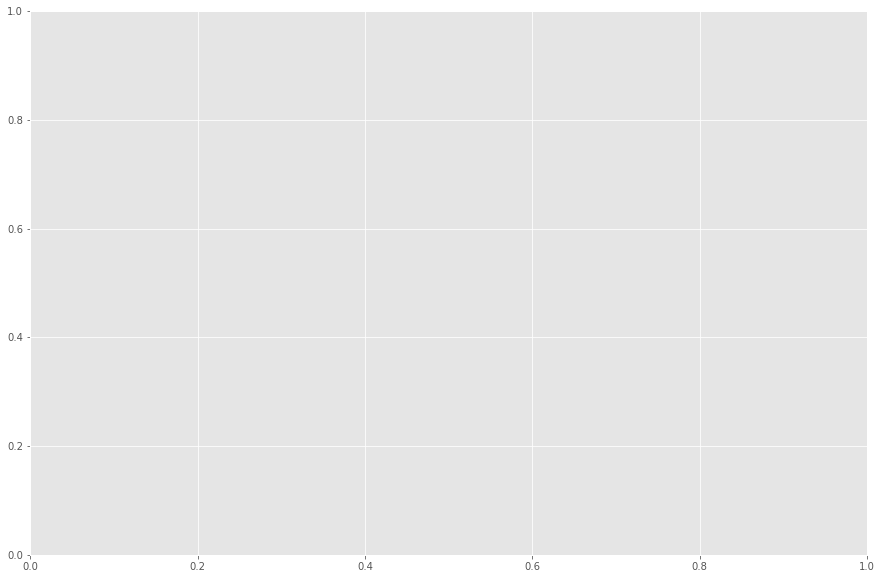

In [54]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for quality, data in df.groupby('betterQuality'):
    ax.scatter(data['alcohol'], data['residual sugar'], label=quality)

# Plot misclassified.
ax.scatter(misclass['alcohol'], misclass['residual sugar'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

ax.set_xlabel('alcohol')
ax.set_ylabel('residual sugar')
ax.legend();

---
**need to go back over this stuff as it doesn't seem to be working!**

In [ ]:
# from sklearn import datasets

# from sklearn.svm import SVC
# df = datasets.load_wine()
# clf = SVC()
# clf.fit(df.data, df.target)

In [ ]:
# list(clf.predict(df.data[:3]))


In [ ]:
# clf.fit(df.data, df.target_names[df.target])

In [ ]:
# list(clf.predict(df.data[:3]))

**Not quite sure what's happening here!**

In [ ]:
# from sklearn.datasets import load_wine
# X, y = load_wine(return_X_y=True)

In [ ]:
# clf = SVC()
# clf.set_params(kernel='linear').fit(X, y)

In [ ]:
# clf.predict(X[:5])

In [ ]:
# clf.set_params(kernel='rbf').fit(X, y)

In [ ]:
# clf.predict(X[:5])

___
**Again need to revise what's going on here**

The following is from https://docs.w3cub.com/scikit_learn/auto_examples/preprocessing/plot_scaling_importance#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [ ]:
# from __future__ import print_function
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.naive_bayes import GaussianNB
# from sklearn import metrics
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_wine
# from sklearn.pipeline import make_pipeline
# print(__doc__)

# # Code source: Tyler Lanigan <tylerlanigan@gmail.com>
# #              Sebastian Raschka <mail@sebastianraschka.com>

# # License: BSD 3 clause

# RANDOM_STATE = 42
# FIG_SIZE = (10, 7)


# features, target = load_wine(return_X_y=True)

# # Make a train/test split using 30% test size
# X_train, X_test, y_train, y_test = train_test_split(features, target,
#                                                     test_size=0.30,
#                                                     random_state=RANDOM_STATE)

# # Fit to data and predict using pipelined GNB and PCA.
# unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
# unscaled_clf.fit(X_train, y_train)
# pred_test = unscaled_clf.predict(X_test)

# # Fit to data and predict using pipelined scaling, GNB and PCA.
# std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
# std_clf.fit(X_train, y_train)
# pred_test_std = std_clf.predict(X_test)

# # Show prediction accuracies in scaled and unscaled data.
# print('\nPrediction accuracy for the normal test dataset with PCA')
# print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

# print('\nPrediction accuracy for the standardized test dataset with PCA')
# print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# # Extract PCA from pipeline
# pca = unscaled_clf.named_steps['pca']
# pca_std = std_clf.named_steps['pca']

# # Show first principal components
# print('\nPC 1 without scaling:\n', pca.components_[0])
# print('\nPC 1 with scaling:\n', pca_std.components_[0])

# # Scale and use PCA on X_train data for visualization.
# scaler = std_clf.named_steps['standardscaler']
# X_train_std = pca_std.transform(scaler.transform(X_train))

# # visualize standardized vs. untouched dataset with PCA performed
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


# for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
#     ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
#                 color=c,
#                 label='class %s' % l,
#                 alpha=0.5,
#                 marker=m
#                 )

# for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
#     ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
#                 color=c,
#                 label='class %s' % l,
#                 alpha=0.5,
#                 marker=m
#                 )

# ax1.set_title('Training dataset after PCA')
# ax2.set_title('Standardized training dataset after PCA')

# for ax in (ax1, ax2):
#     ax.set_xlabel('1st principal component')
#     ax.set_ylabel('2nd principal component')
#     ax.legend(loc='upper right')
#     ax.grid()

# plt.tight_layout()

# plt.show()

___
<br>

### References

https://seaborn.pydata.org/generated/seaborn.histplot.html

# END